In [1]:
# bokeh basics
from bokeh.plotting import figure
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import geopandas as gpd

# Read the data from a csv into a dataframe
df = pd.read_csv('C:/Users/jwhoj/Desktop/Capstone_1/KC_house_data.csv', index_col=0)


In [2]:
# Summary stats for the column of interest
df['price'].describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [3]:
house_price = df['price']

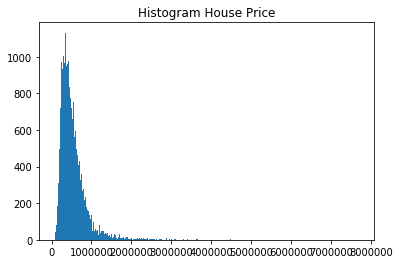

In [4]:
plt.hist(house_price, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram House Price")
plt.show()

In [5]:
# Calculate mean of prices in King County
mean = np.mean(df['price'])
min = np.min(df['price'])
max = np.max(df['price'])
print('The mean price of houses in King County is:', mean)
print('The min price of houses in King County is:',min)
print('The max price of houses in King County is:',max)

The mean price of houses in King County is: 540182.1587933188
The min price of houses in King County is: 75000.0
The max price of houses in King County is: 7700000.0


In [6]:
"""Bins will be ten thousand dollars in width, so the number of bins 
is (length of interval / 1000). Limit price to [200000, 7000000] dollars using the range."""

arr_hist, edges = np.histogram(df['price'], 
                               bins = int(7200000/200000), 
                               range = [50000, 9000000])

# Put the information in a dataframe
price = pd.DataFrame({'price': arr_hist, 
                       'left': edges[:-1], 
                       'right': edges[1:]})

In [7]:
price.head()

,price,left,right
0,4325,5.000000e+04,2.986111e+05
1,9514,2.986111e+05,5.472222e+05
2,4726,5.472222e+05,7.958333e+05
3,1677,7.958333e+05,1.044444e+06
4,561,1.044444e+06,1.293056e+06


In [17]:
# Create the blank plot
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of King County House Prices',
          x_axis_label = 'Number of Houses (Quantity)', 
           y_axis_label = 'House Price ($)')

# Add a quad glyph
p.quad(bottom=0, top=df['price'], 
       left=price['left'], right=price['right'], 
       fill_color='red', line_color='black')

# Show the plot
show(p)

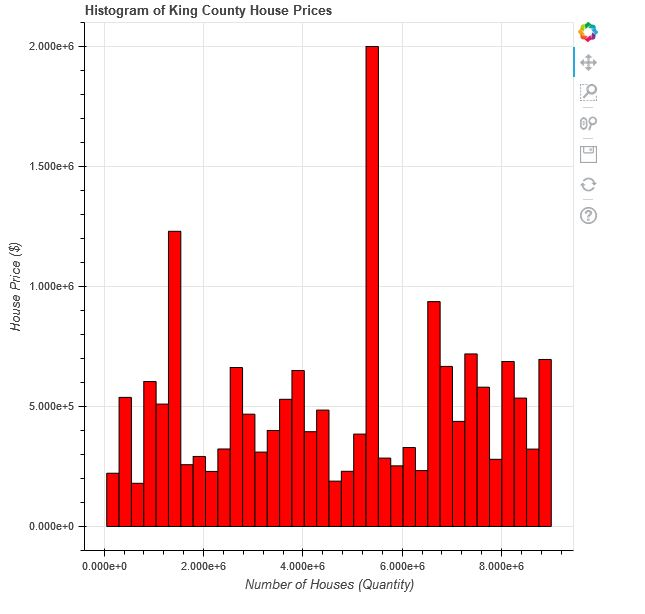

In [9]:
# Since Bokeh does not render on Github, here is the JPG 
from IPython.display import Image
img = 'C:/Users/jwhoj/Desktop/hist1.jpg'
Image(filename=img)


In [18]:
# Import the ColumnDataSource class
from bokeh.models import ColumnDataSource

# Convert dataframe to column data source
src = ColumnDataSource(price)
src.data.keys()


dict_keys(['index', 'price', 'left', 'right'])

In [19]:
# Add a quad glyph with source this time
p.quad(source = src, bottom=0, top='price', 
       left='left', right='right', 
       fill_color='red', line_color='black')

GlyphRenderer(id='1618', ...)

In [20]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource

output_file("house_price")

src = ColumnDataSource(price)

TOOLTIPS = [
    ('House Price', '@left'),
                          ('Quantity of Houses', '$y'),
]

# Create the blank plot
p = figure(plot_width=600, plot_height=600, tooltips=TOOLTIPS,
           title = 'Histogram of King County House Prices',
          x_axis_label = 'Price of Houses', 
           y_axis_label = 'Quantity of Houses')


# Add a quad glyph with source this time
p.quad(bottom=0, top='price', left='left', right='right', source=src,
       fill_color='red', line_color='black', fill_alpha = 0.75,
       hover_fill_alpha = 1.0, hover_fill_color = 'navy')

# Show the plot
show(p)

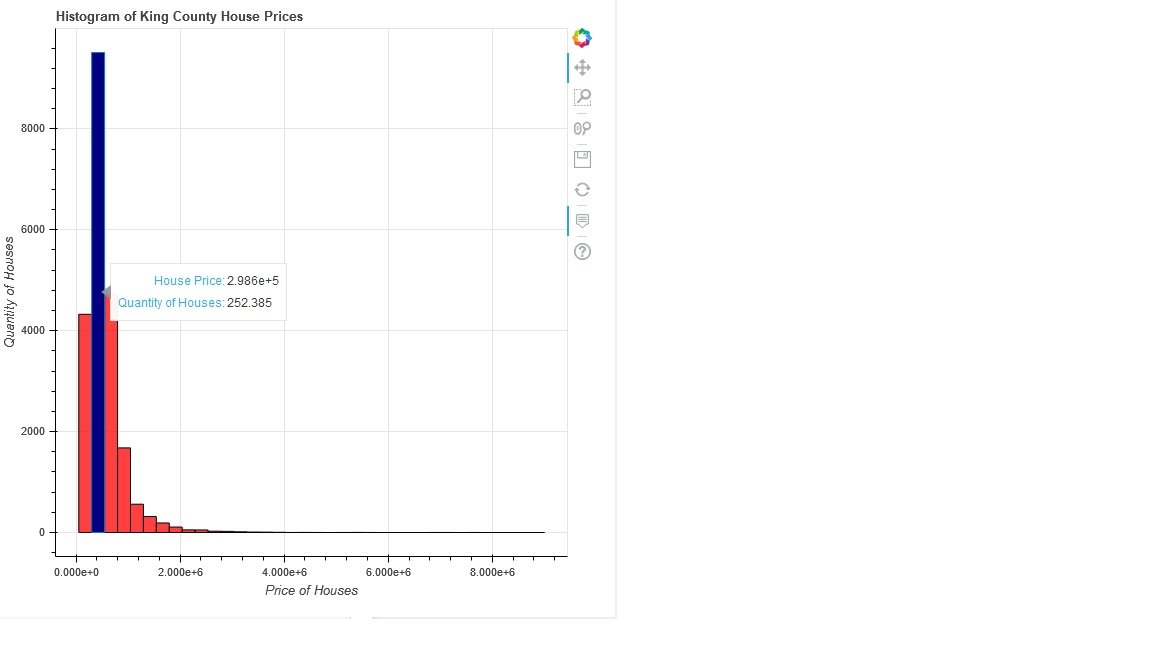

In [13]:
# Since Bokeh does not render on Github, here is the JPG 
from IPython.display import Image
img = 'C:/Users/jwhoj/Desktop/hist2.jpg'
Image(filename=img)

In [21]:
# Import savings function
from bokeh.io import output_file

# Specify the output file and save
output_file('hist.html')
show(p)